# Regression


Regression is usually termed as determining relationship(s) between two or more variables.

For example, in the above two examples, X and Y are the variables. X is termed as the independent variable and Y is termed as the dependent variable (because its value is calculated using X). Also, Y has a continous range (unlike classification where Y is discrete).

# Linear Regression / Simple Linear Regression


Simple Linear Regression (SLR) is termed as simple because there is only one independent variable.

Suppose we have a dataset which contains information about relationship between 'Years of experience' and 'Salary' in a particular work field.

The dependent variable could represent salary. You could assume that level of experience will impact salary. So, you would label the independent variable as experience.

Representing the experience with variable x and salary with y, we can say that y ∝ x. ( y is proportional to x).

However, a change in x does not usually mean an equal change in y.

The coefficient can be thought of as a multiplier that connects the independent and dependent variables. It translates how much y will be affected by a unit change in x.

Let's add a coefficient b1 to our example.

We thus get $y = b_1*x$

Now the salaries in a particular job always start with the base amount or the lowest possible salary. We thus need to take that constant in consideration.

The constant b0 would be the starting salary for someone with a zero level of experience. Assuming every fresher in the company gets 30K as starting salary we can set it as the base price.

Finally, we have:

$Salary = b_0 + b_1* Experience$

or

$y = b_0 + b_1*x$

This is similar to the equation of a straight line $y= m*x +c$



# Linear Regression with Python Scikit Learn

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### Importing Libraries

In [1]:
import numpy as np # to perform calculations 
import pandas as pd # to read data
import matplotlib.pyplot as plt # to visualise
import seaborn as sns # to visualise

### Importing Dataset

In [2]:
#Loading the dataset
url = "http://bit.ly/w-data"
dataset = pd.read_csv(url)

In [3]:
#Let's have a look at what our data is like
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Plotting the Data

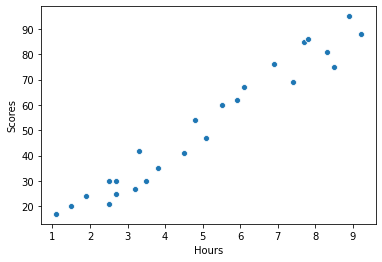

In [5]:
# Scatter plot helps in visualising the data distribution
sns.scatterplot(x = dataset.Hours, y=dataset.Scores)

###### As you can see, there is a clear relationship between the number of hours studied and percentage of score.

### Setting variables

Our next step is to divide the data into “attributes” and “labels” or as you've already known as input and target variables.

In our dataset, we only have two columns. We want to predict the Percentage of Score depending upon the No. of Hour Studied. Therefore our attribute set will consist of the “Hours” column which is stored in the X variable, and the label will be the “Percenage” column which is stored in y variable.

In [7]:
X = dataset.iloc[:, :-1].values  
y = dataset.iloc[:, 1].values  

### Splitting the Dataset



Next, we split 80% of the data to the training set while 20% of the data to test set using below code. The test_size variable is where we actually specify the proportion of the test set.

By passing our X and y variables into the train_test_split() method of sklearn, we are able to capture the splits in data by assigning 4 variables to the result.


In [8]:
# import SK Learn train test split
from sklearn.model_selection import train_test_split 

# Assign variables to capture train test split output
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Working of Linear Regression

Our objective is to find the values of $b_0$ and $b_1$ that will best fit this data.

These 2 variables/coefficients are actually called hyperparameters. 

In machine learning, a hyperparameter is a parameter whose value is used to control the learning process. And we must always try to find some optimal parameters while building a machine learning model.

This line is your regression model.

### Training Our Model

After splitting the data into training and testing sets, finally, the time is to train our algorithm. Firstly, importing of sklearn.linear_model is required for us to access LinearRegression. It then needs to be instantiated and model fit to our training data. 

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
linear_regressor = LinearRegression()  # create object for the class

#fit model to our training data i.e learn coefficients
linear_regressor.fit(X_train, y_train)

LinearRegression()

### Interpreting Coefficient

The coefficients(b0 and b1) will allow us to model our equation with values and find the best fit line. The linear_regressor variable (assigned to a LinearRegression object), is able to have the intercept and coefficients extracted, using the code below.

In [12]:
# prints y-intercept
print(linear_regressor.intercept_)

# prints the coefficient
print(linear_regressor.coef_)

2.370815382341881
[9.78856669]


The intercept will be your $b_0$ value; and coefficient will be $b_1$.

### Making predictions based on your model

Now that we have trained our algorithm, it’s time to make some predictions. To do so, we will use our test data and see how accurately our algorithm predicts the percentage.

Making predictions based on your model is as simple as using the code below: passing the predict method your test data. This will return predicted values of y given the new test X data.

In [13]:
y_pred = linear_regressor.predict(X_test)  # make predictions

We have our predictions in y_pred. Now lets visualize the data set and the regression line with the test data:

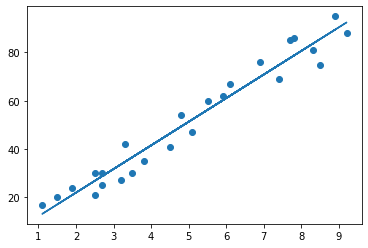

In [22]:
# Plotting the regression line
line = linear_regressor.coef_*X+linear_regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line)
plt.show()



As you can see, the algorithm has drawn a line that passes through the maximum test data points and has the minimum distance from the others. This line is known as the "best-fit" or the regression line.

Since this line has a positive slope, we can say that the percentage increases as no. of Hours increase.


In [24]:
print(X_test) # Testing data - In Hours
y_pred = linear_regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [25]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [28]:
# You can also test with your own data
hours = 9.25
own_pred = linear_regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.91505723477056


### Model Evaluation

There are three primary metrics used to evaluate linear models. These are: Mean absolute error (MAE), Mean squared error (MSE), or Root mean squared error (RMSE).

In [29]:
# import metrics library
from sklearn import metrics

# print result of MAE
print(metrics.mean_absolute_error(y_test, y_pred))

#print result of MSE
print(metrics.mean_squared_error(y_test, y_pred))

#print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

4.419727808027652
22.96509721270043
4.792191274636315
